In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
# Load the Dataset 
df = pd.read_csv('loan_sanction_test.csv')
# Display the first few row of the dataset
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
# Check the number of columns, the null values, and the data types in the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [13]:
# Check how many rows and columns in the dataset
df.shape

(367, 12)

In [6]:
# Check the missing values in the dataset 
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
# Fill Missing Values with Mode and Median
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

In [8]:
df[df['Self_Employed'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [9]:
df['LoanAmount']=df['LoanAmount'].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


# Univariate Analysis


 Histograms: Plot the frequency distribution of
 key numeric variables.

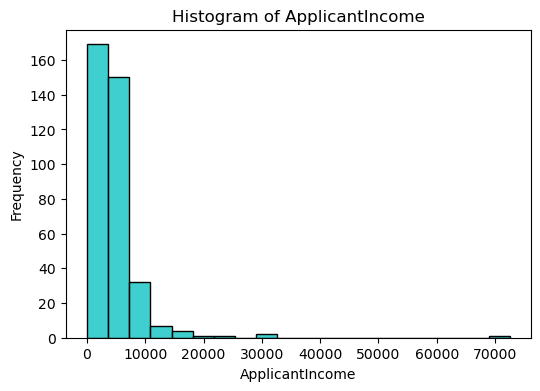

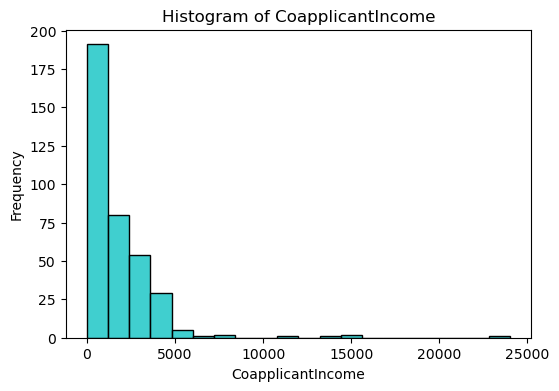

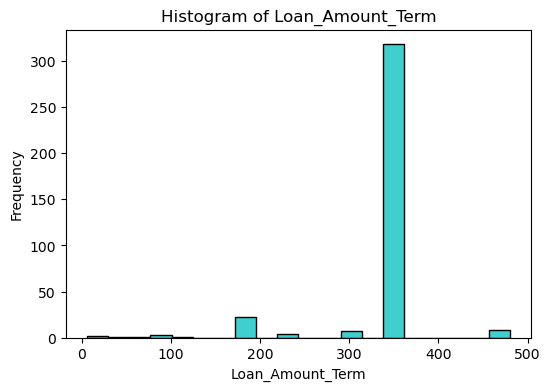

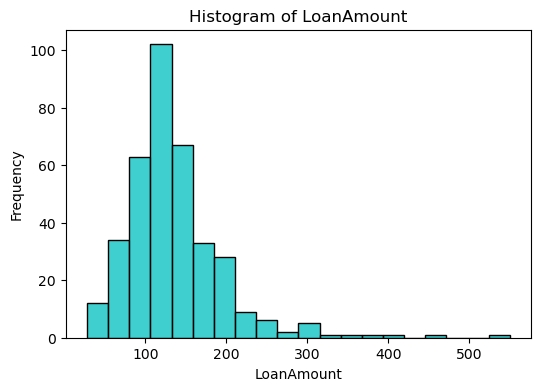

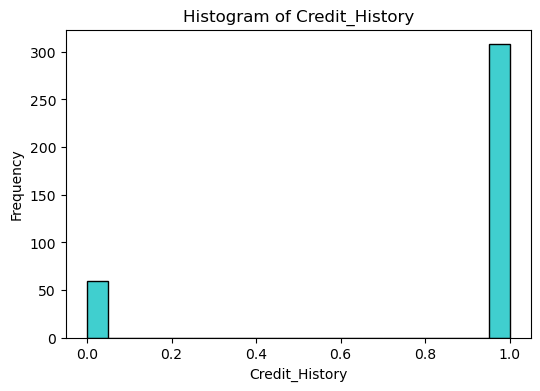

In [16]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term','LoanAmount', 'Credit_History']

for c in cols:
    plt.figure (figsize=(6,4))         # create a new figure for each plot
    sns.histplot(df[c], bins=20, color ='c'  )
    plt.title(f'Histogram of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

Box Plots: Identify potential outliers and
 visualize the spread of data.

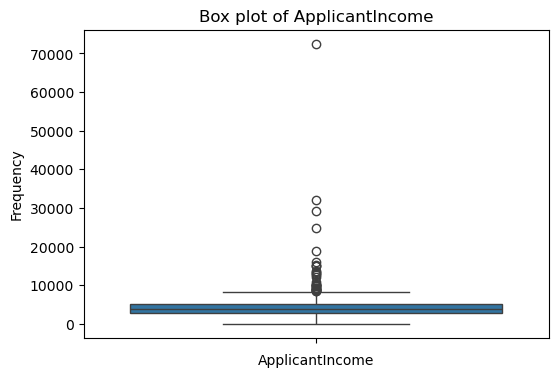

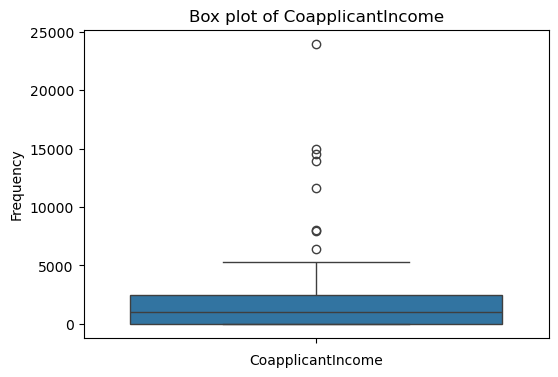

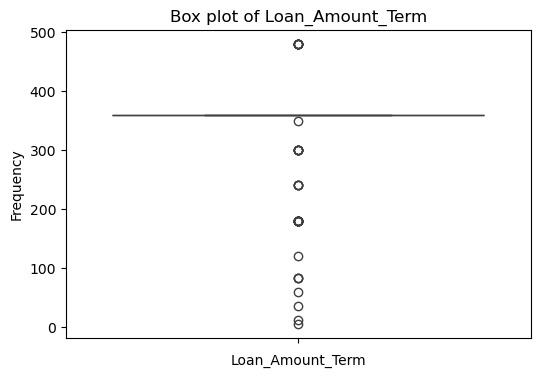

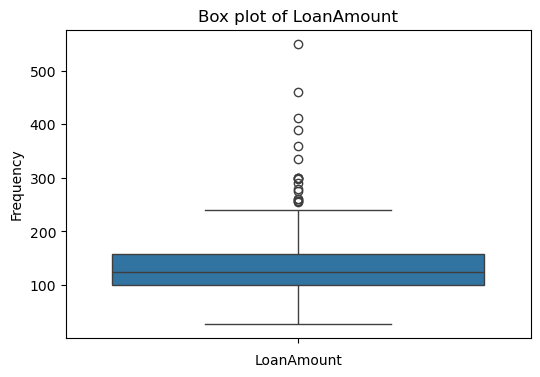

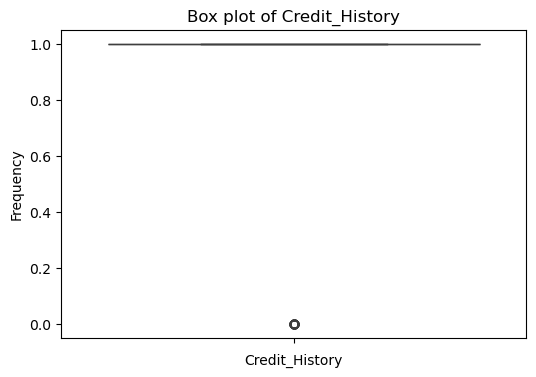

In [14]:
cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount','Credit_History']

for c in cols:
    plt.figure (figsize=(6,4))         # create a new figure for each plot
    sns.boxplot(df[c]  )
    plt.title(f'Box plot of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

 Analyze categorical variables by creating the
 following plots: * Bar Charts: Visualize the frequency distribution
 of categorical variables.

In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

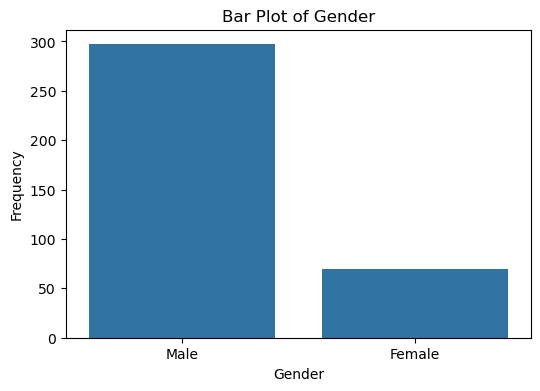

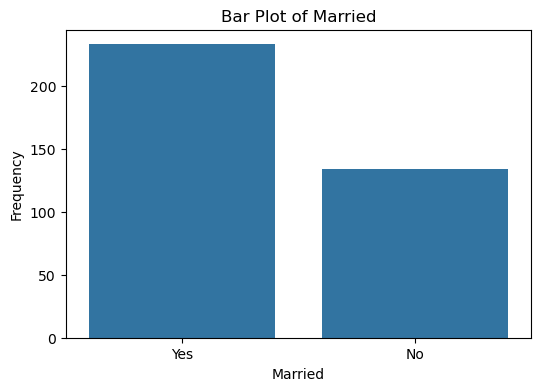

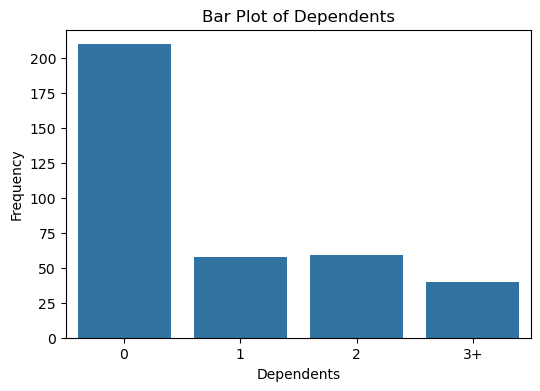

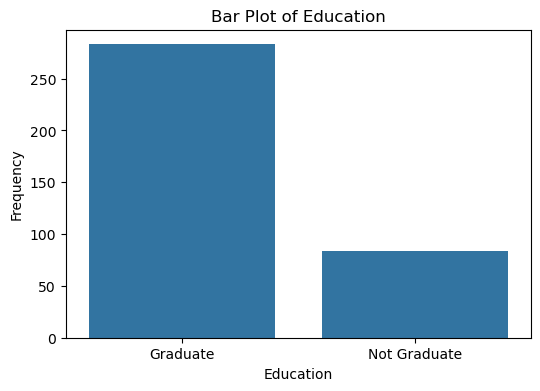

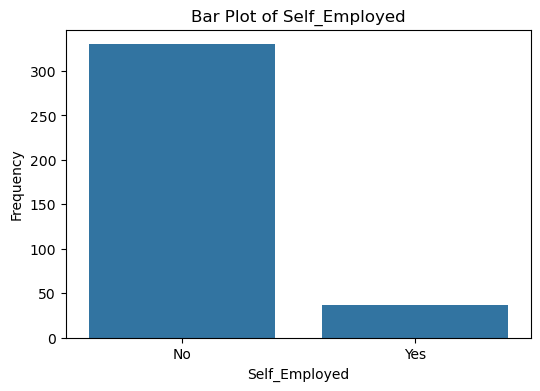

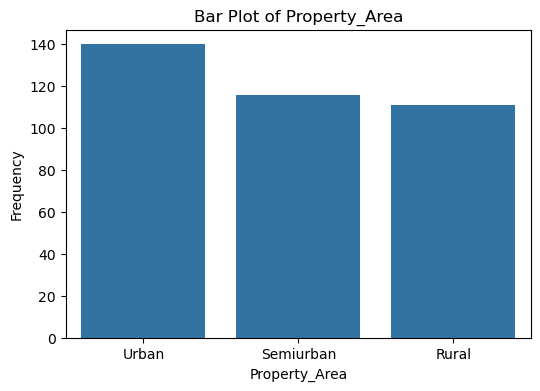

In [19]:
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area']
for c in categorical_cols :
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[c])
    plt.title(f'Bar Plot of {c}')
    plt.xlabel(c)
    plt.ylabel('Frequency')
    plt.show()

 Pie Charts: Represent the composition of
 categorical variables

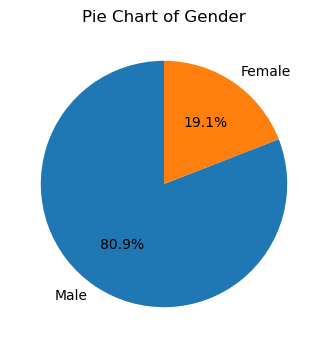

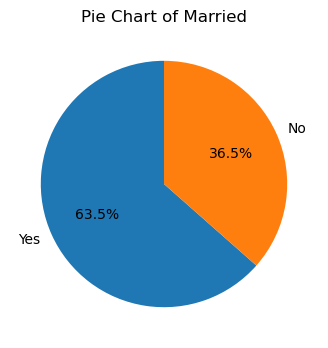

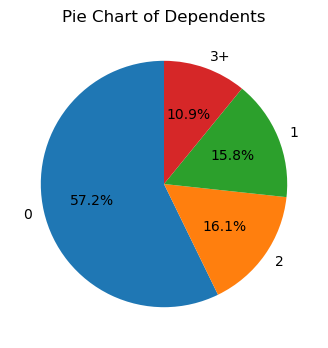

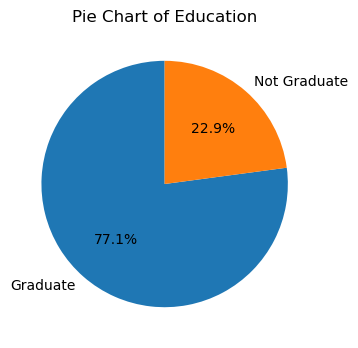

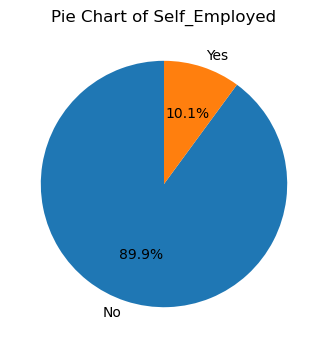

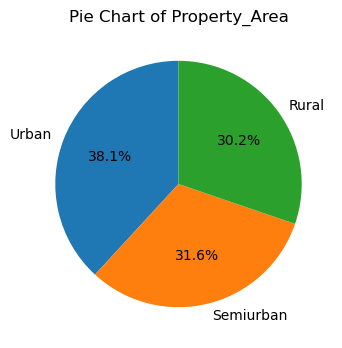

In [20]:
pie = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed','Property_Area']
for p in pie :
    plt.figure(figsize=(6,4))
    df[p].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart of {p}')
    plt.ylabel('')  # removes y-label
    plt.show()

# 2.2 Bivariate Analysis

-->  Create scatter plots to explore relationships
 between pairs of numeric variables.

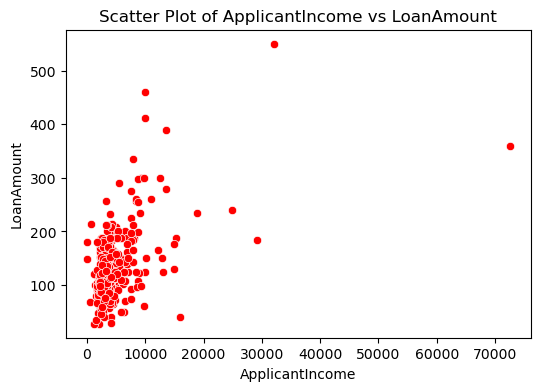

In [30]:

    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='ApplicantIncome', y='LoanAmount',color = 'r' , data = df )
    plt.title('Scatter Plot of ApplicantIncome vs LoanAmount')
    plt.xlabel('ApplicantIncome')
    plt.ylabel('LoanAmount')
    plt.show()

--> Use pair plots (scatter matrix) to visualize
 interactions between multiple numeric
 variables simultaneously.

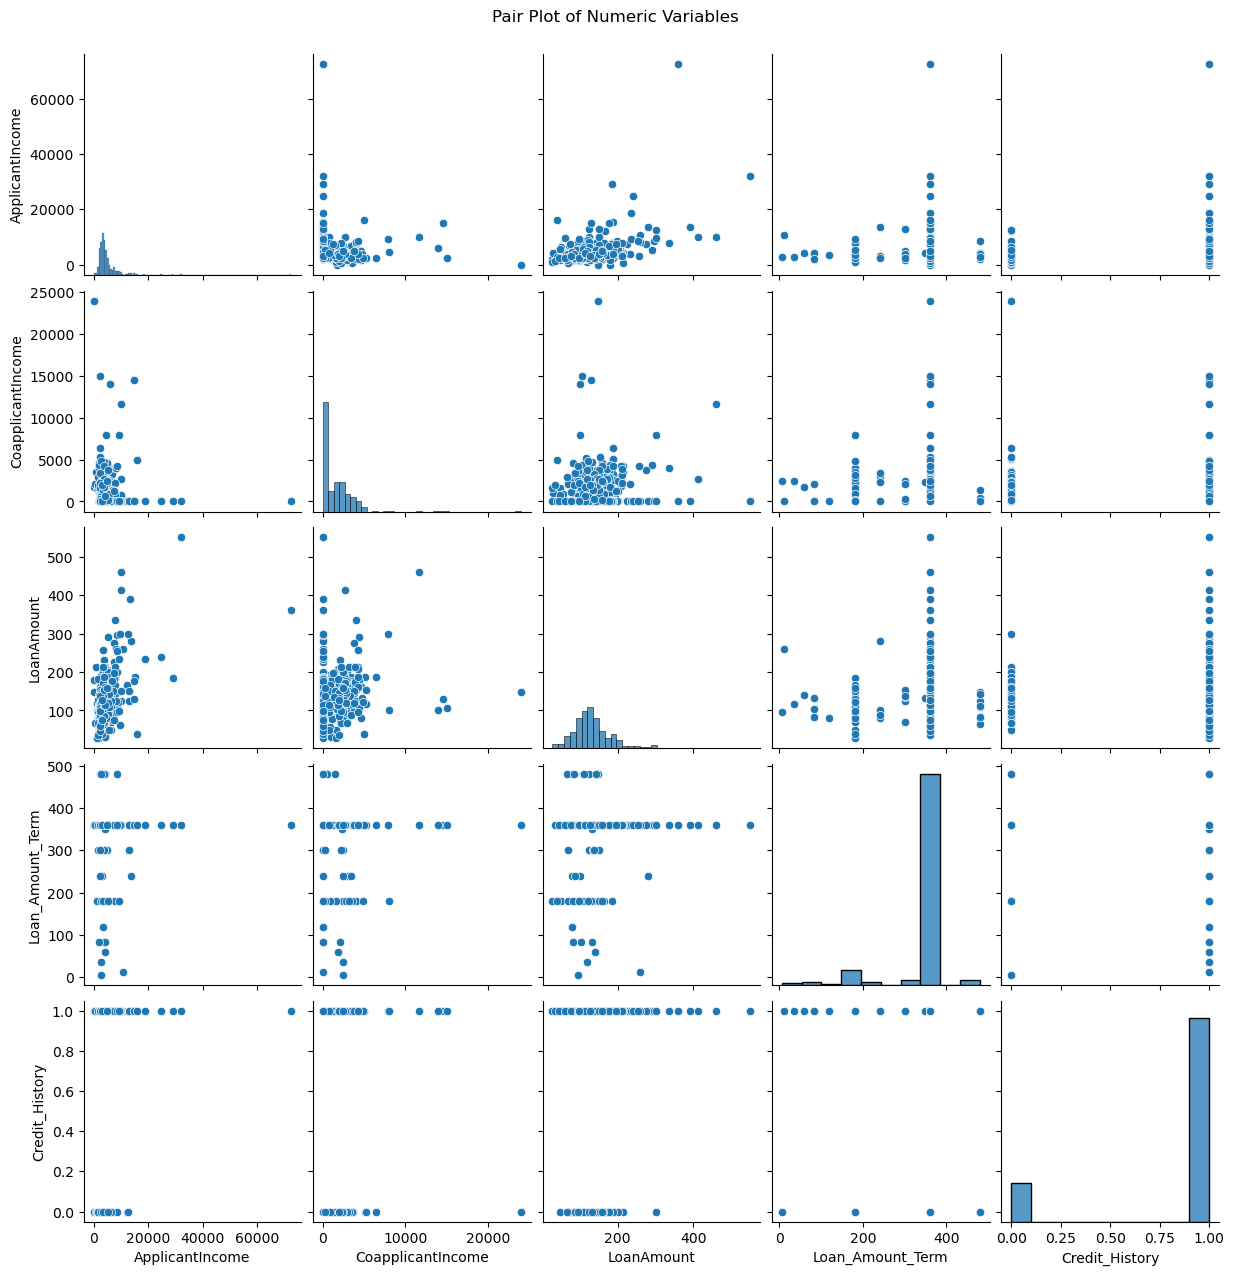

In [31]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']

sns.pairplot(df[numeric_cols])
plt.suptitle('Pair Plot of Numeric Variables', y=1.02)
plt.show()

--> Investigate the relationship between
 categorical and numeric variables using box
 plots or violin plots

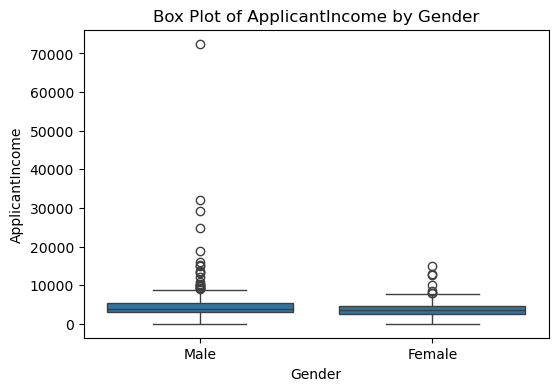

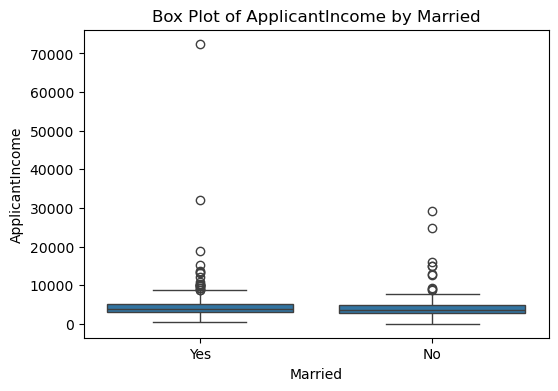

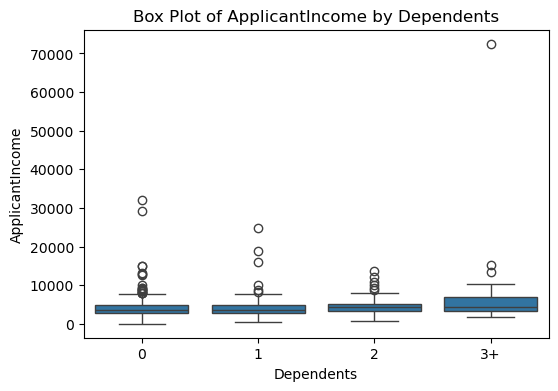

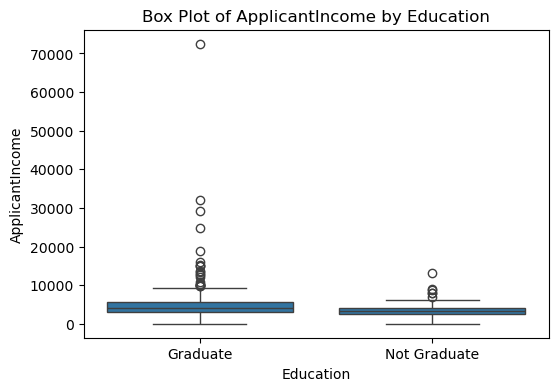

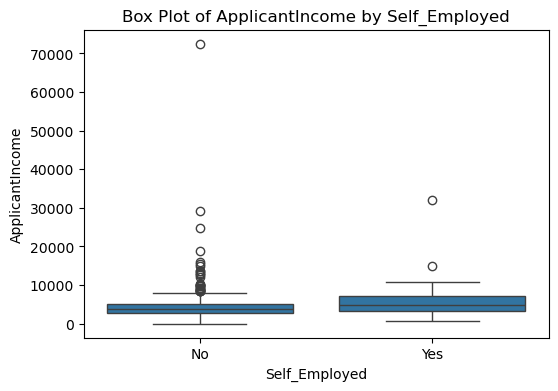

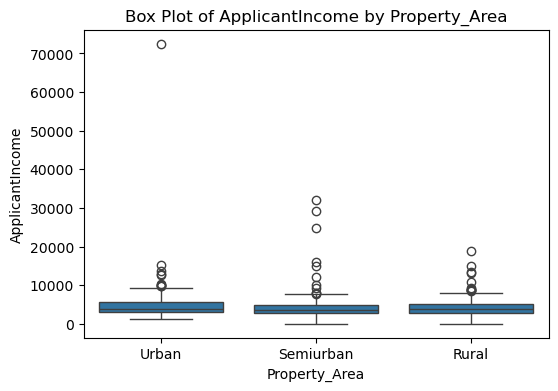

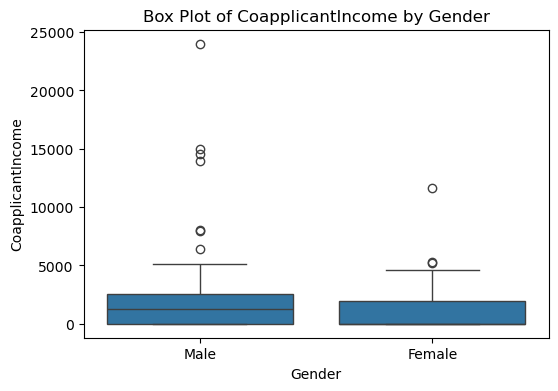

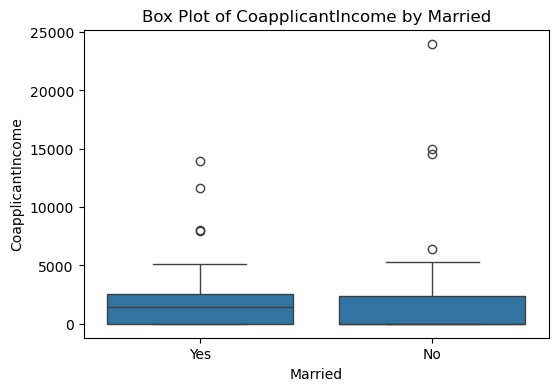

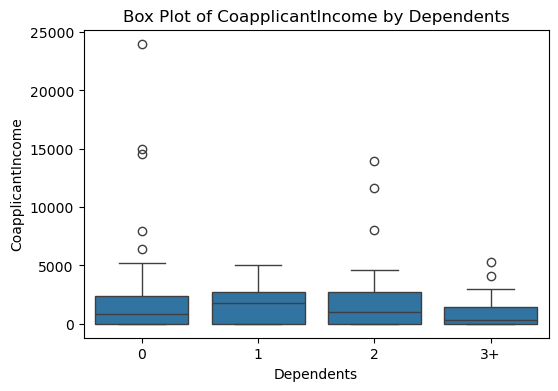

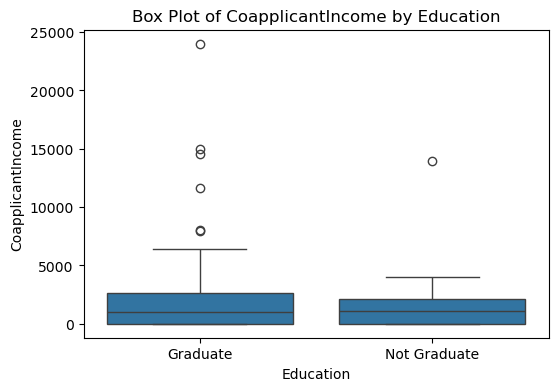

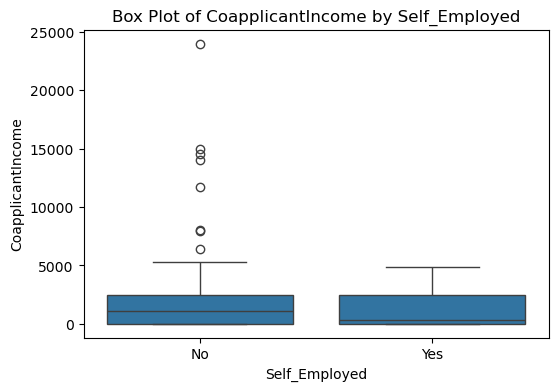

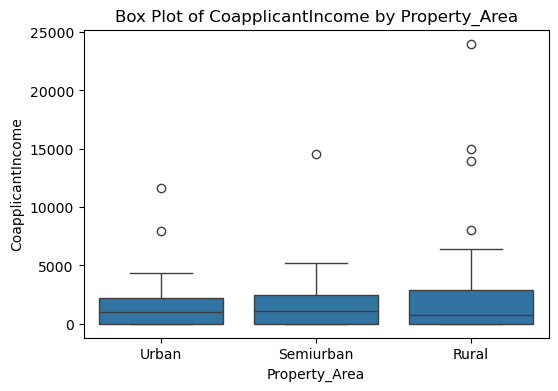

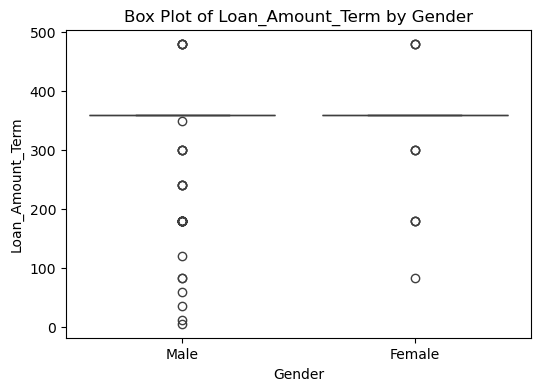

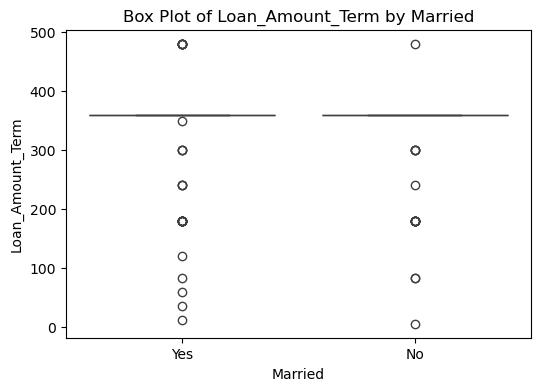

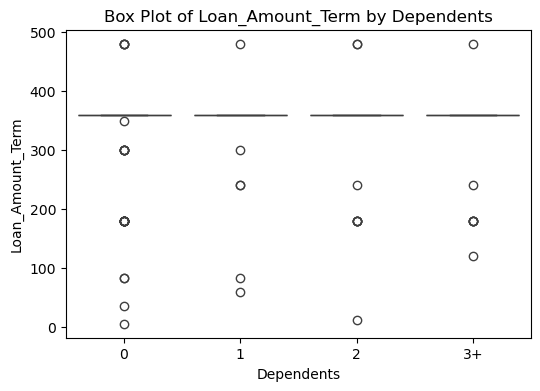

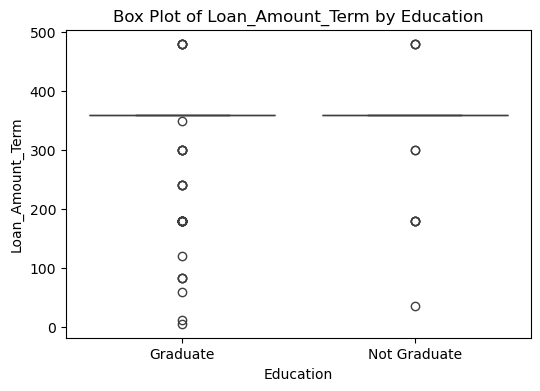

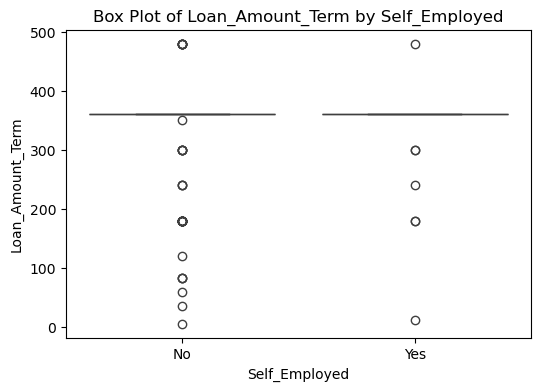

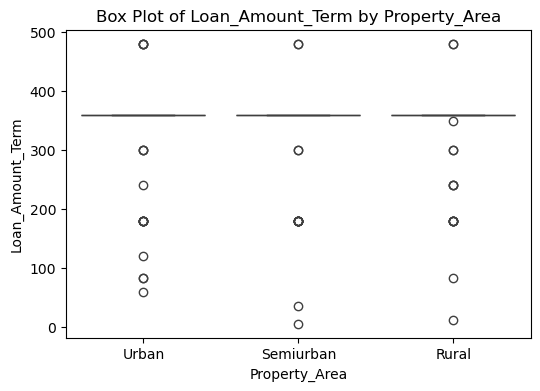

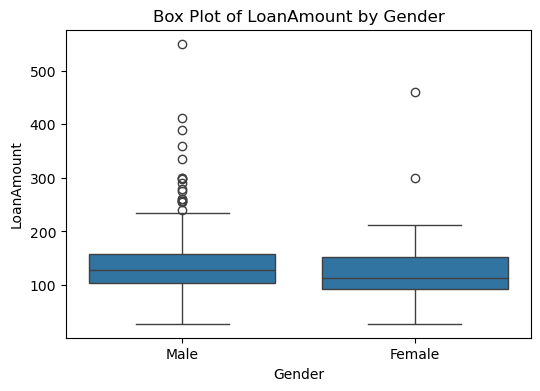

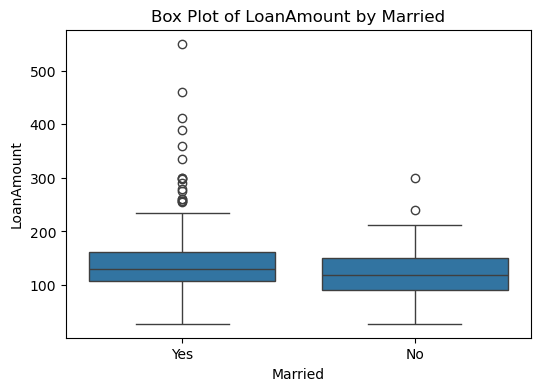

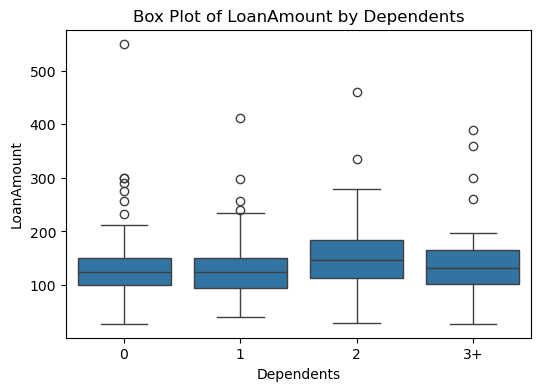

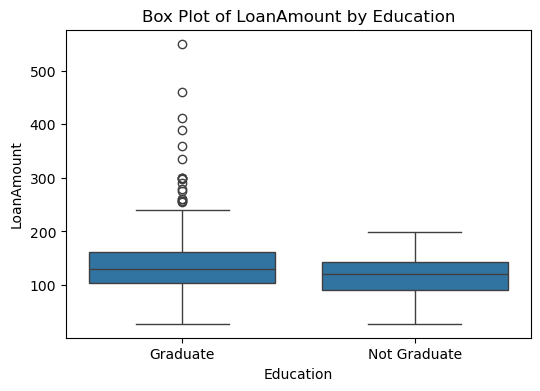

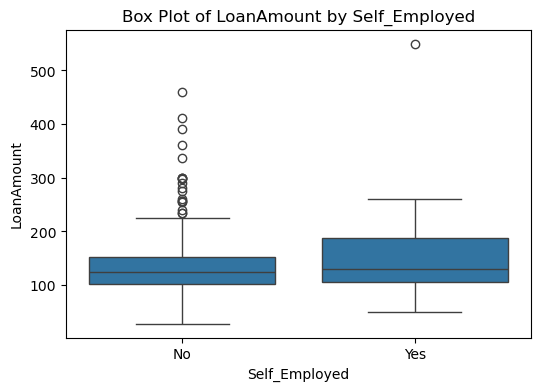

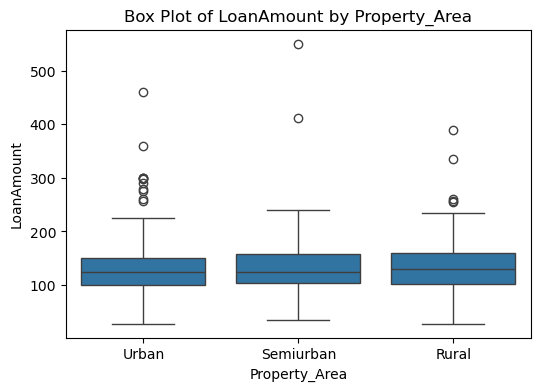

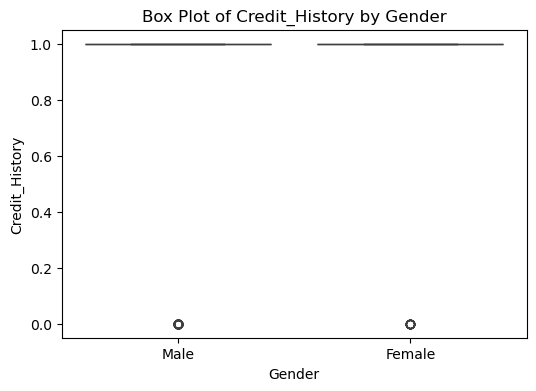

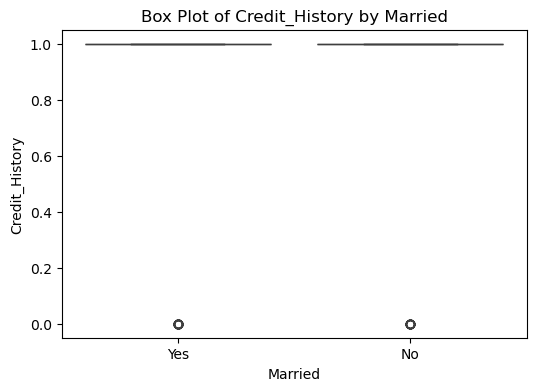

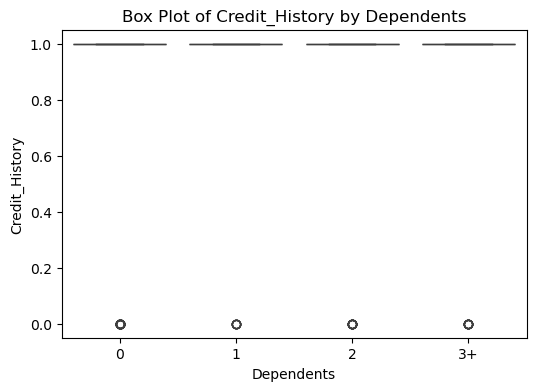

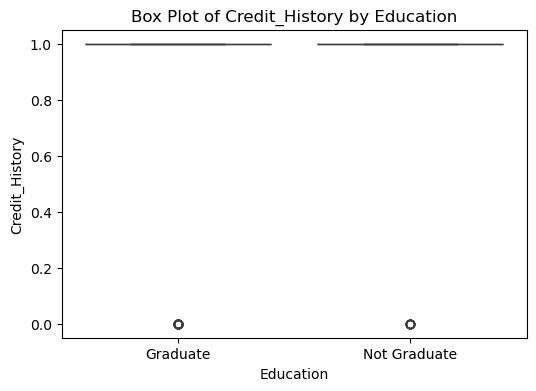

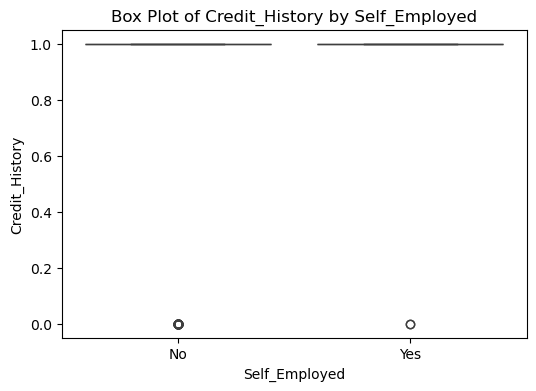

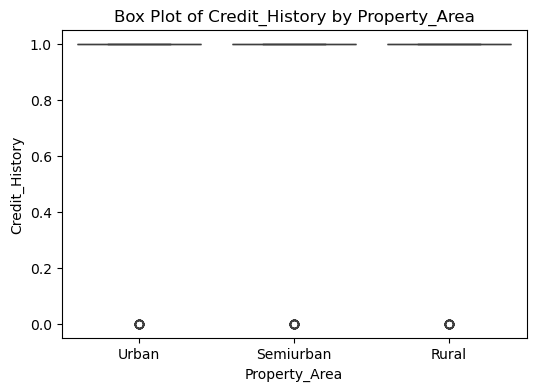

In [26]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount','Credit_History']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']

for num in numeric_cols:
    for cat in categorical_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=df[cat], y=df[num])
        plt.title(f'Box Plot of {num} by {cat}')
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.show()
       


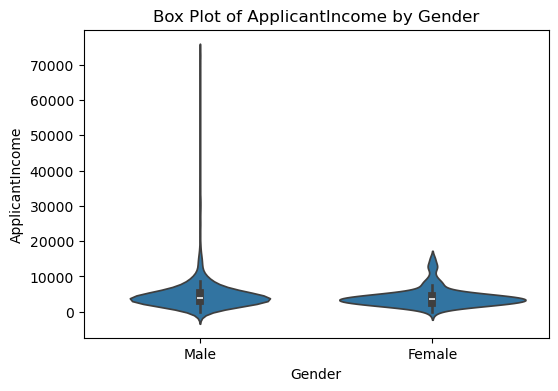

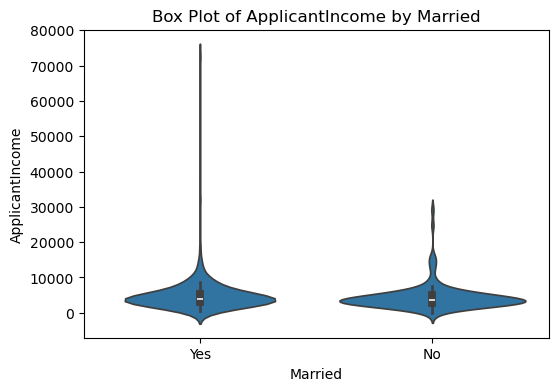

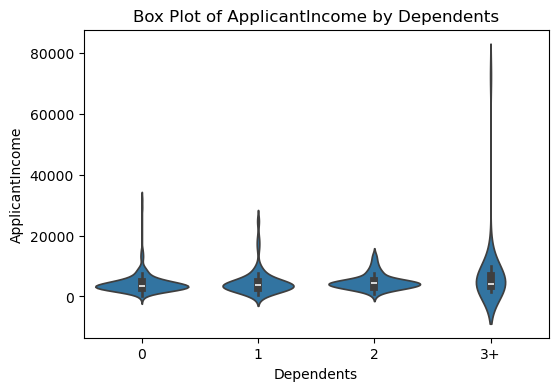

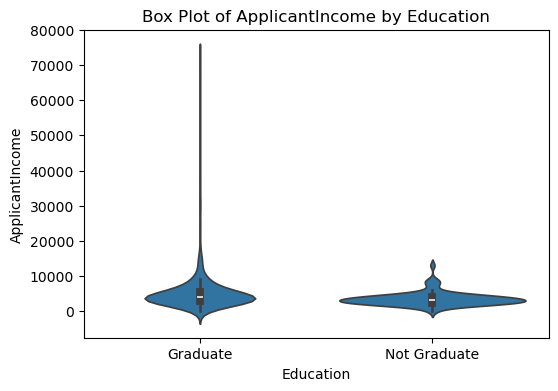

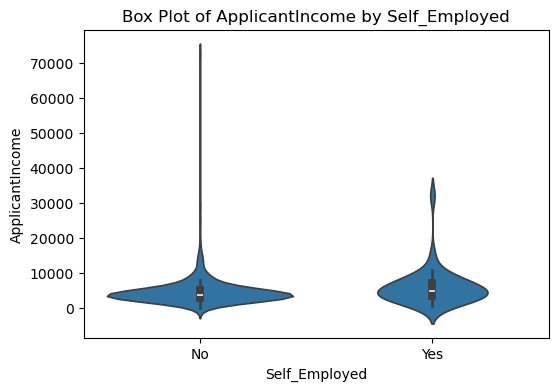

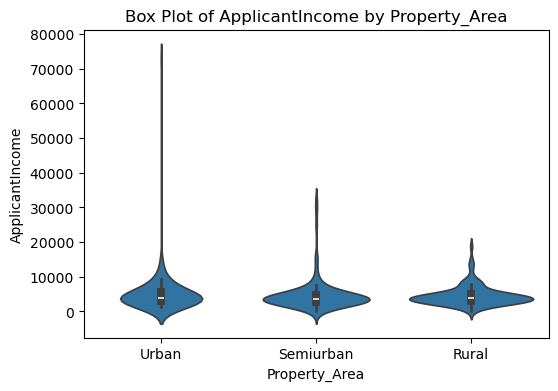

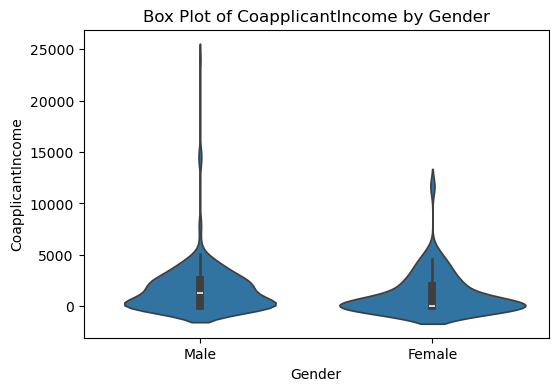

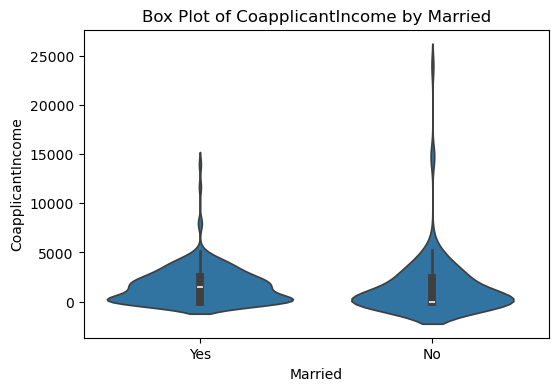

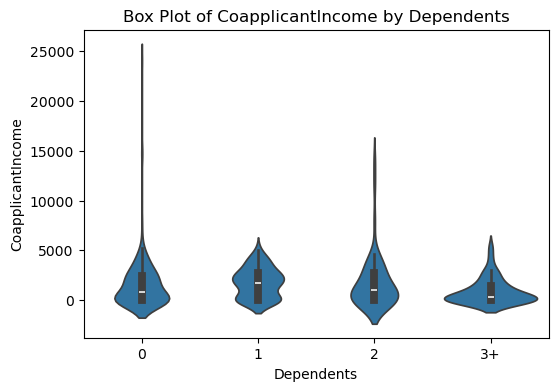

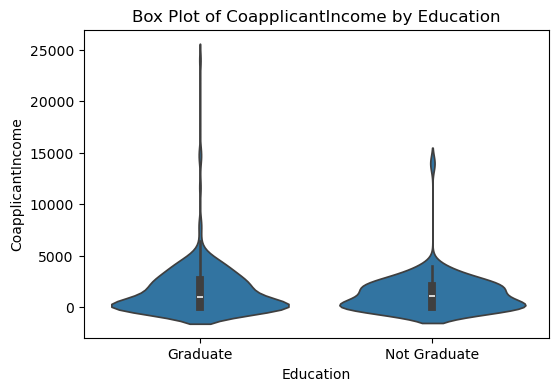

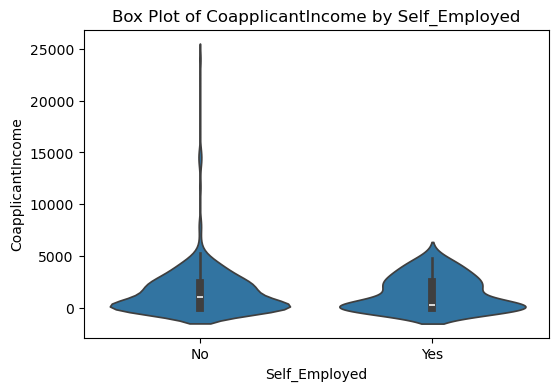

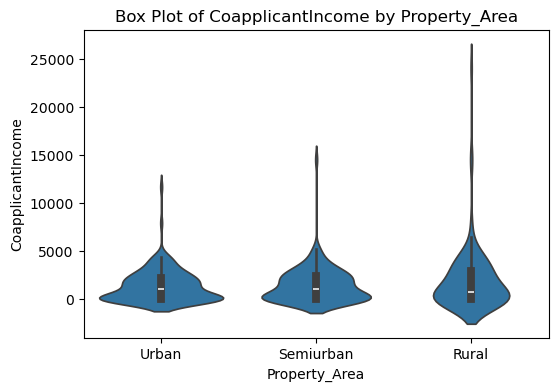

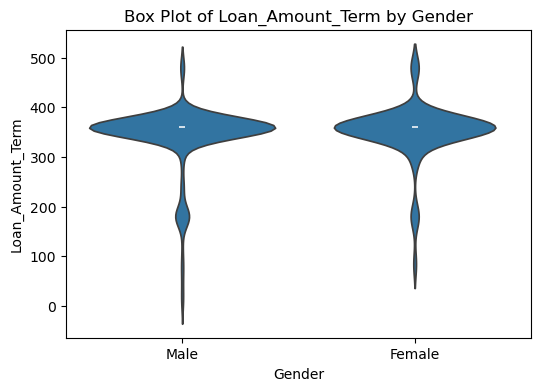

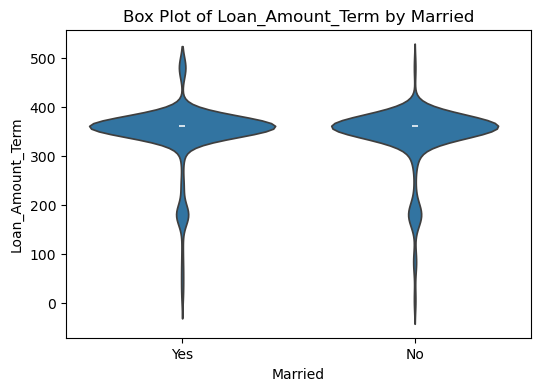

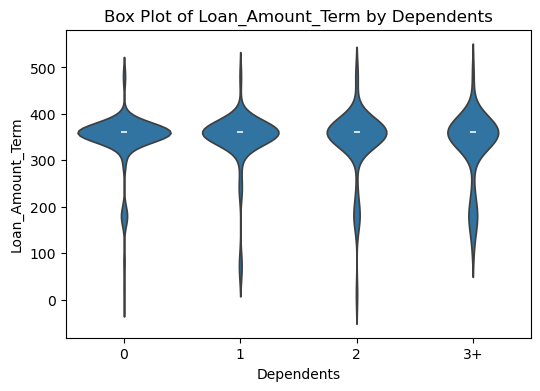

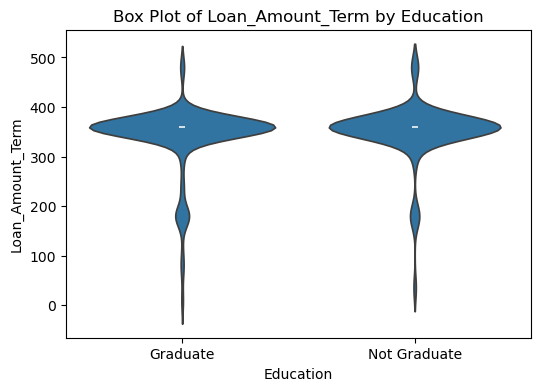

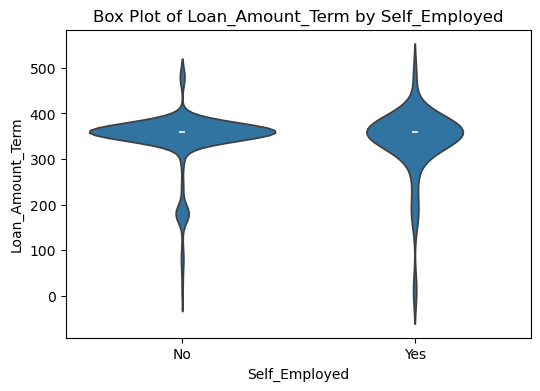

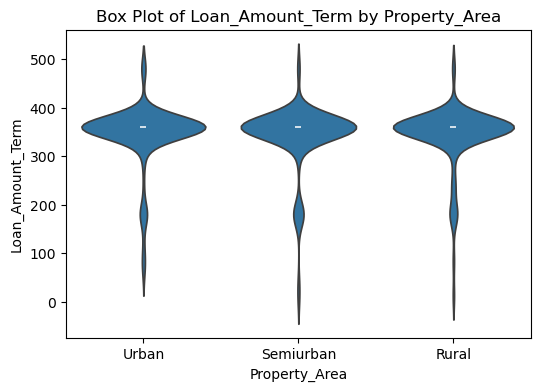

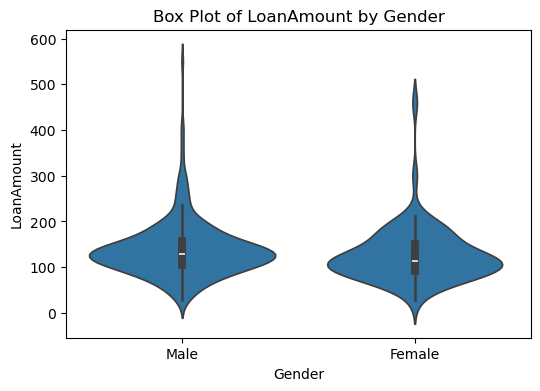

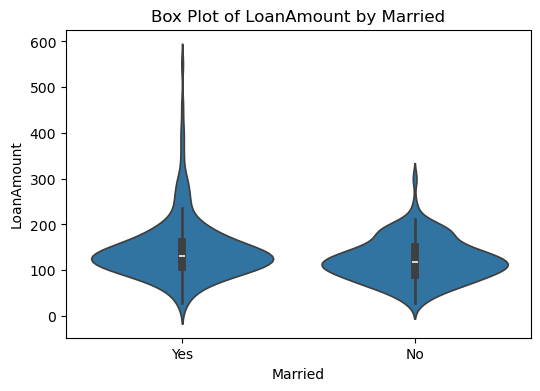

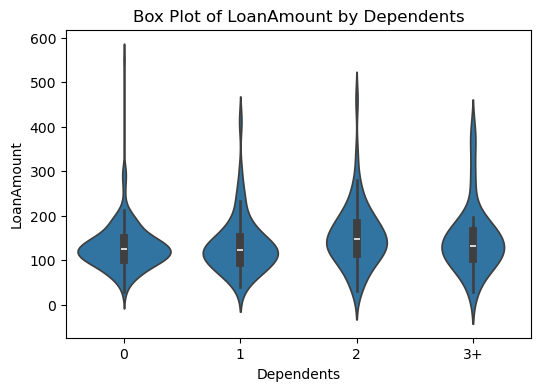

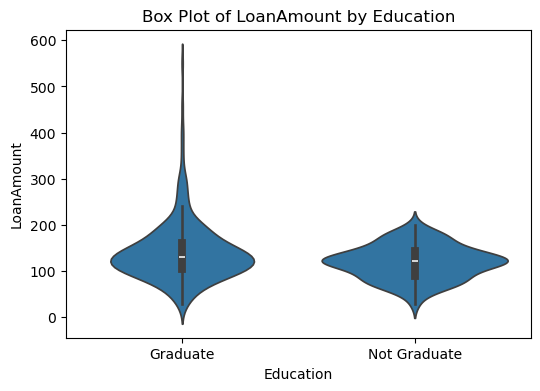

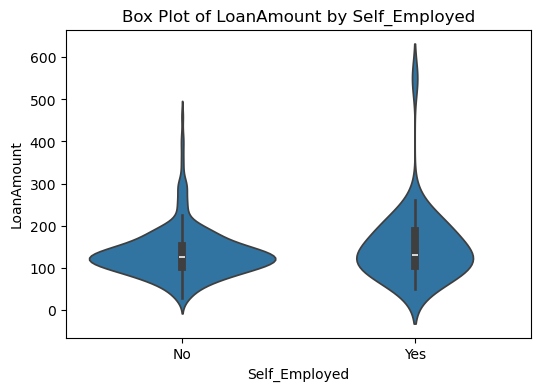

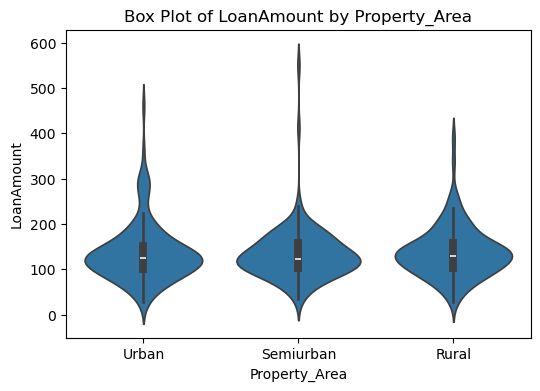

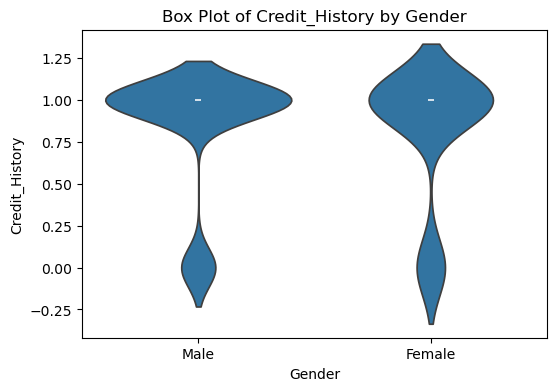

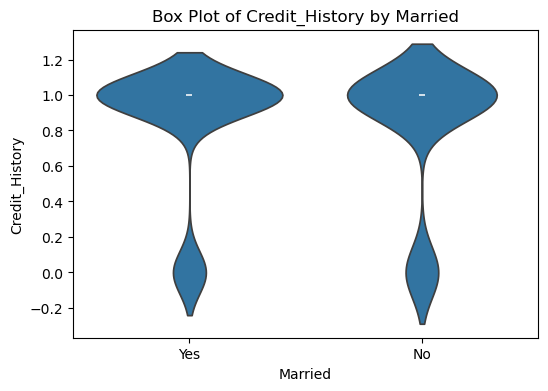

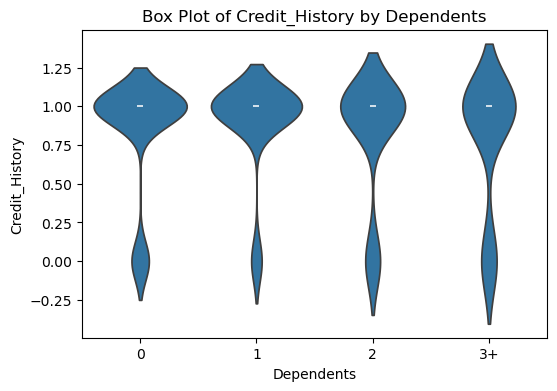

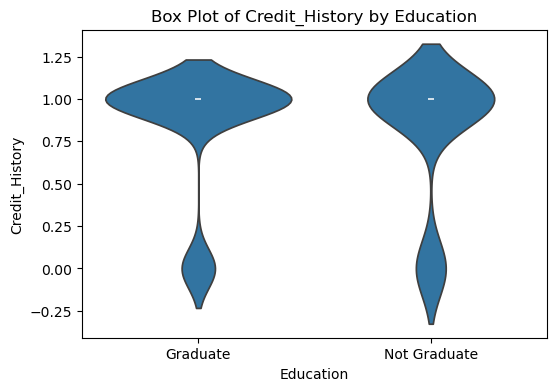

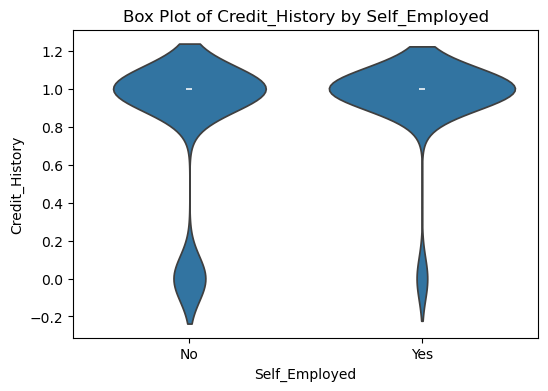

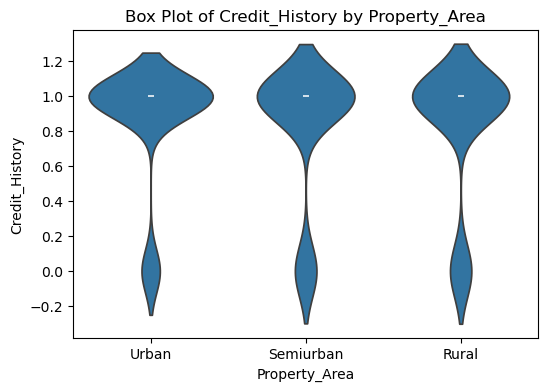

In [27]:
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'Loan_Amount_Term', 'LoanAmount','Credit_History']
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Property_Area']

for num in numeric_cols:
    for cat in categorical_cols:
        plt.figure(figsize=(6, 4))
        sns.violinplot(x=df[cat], y=df[num])
        plt.title(f'Box Plot of {num} by {cat}')
        plt.xlabel(cat)
        plt.ylabel(num)
        plt.show()

#  2.3 Multivariate Analysis

-->  Perform a correlation analysis to identify
 relationships between numeric variables.

In [32]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.110335    0.488737   
CoapplicantIncome        -0.110335           1.000000    0.150034   
LoanAmount                0.488737           0.150034    1.000000   
Loan_Amount_Term          0.023319          -0.008633    0.091867   
Credit_History            0.094944          -0.058004   -0.012932   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome            0.023319        0.094944  
CoapplicantIncome         -0.008633       -0.058004  
LoanAmount                 0.091867       -0.012932  
Loan_Amount_Term           1.000000       -0.048189  
Credit_History            -0.048189        1.000000  


-->  Visualize correlations using a heatmap.

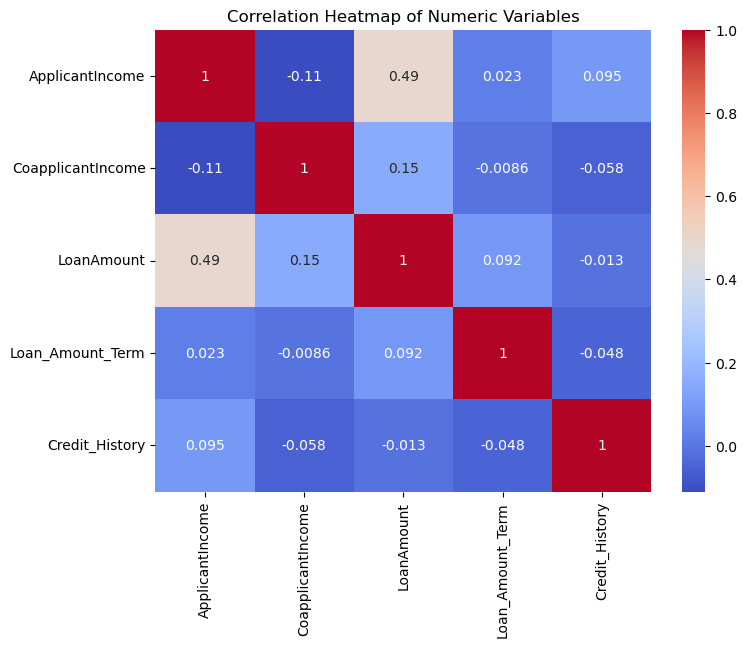

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

--> Create a stacked bar chart to show the
 distribution of categorical variables across
 multiple categories

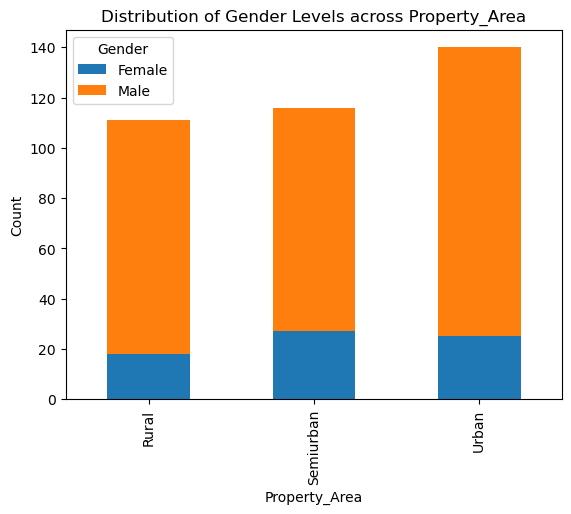

In [44]:
a = pd.crosstab(df['Property_Area'],df['Gender'])
a.plot(kind='bar',stacked=True)
plt.title('Distribution of Gender Levels across Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.show()

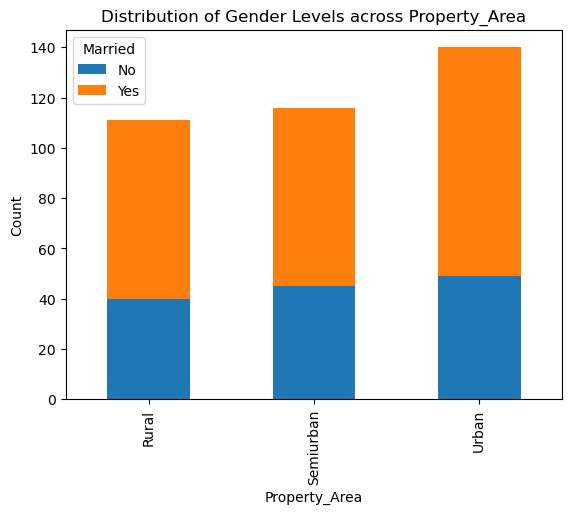

In [45]:
b = pd.crosstab(df['Property_Area'],df['Married'])
b.plot(kind='bar',stacked=True)
plt.title('Distribution of Gender Levels across Property_Area')
plt.xlabel('Property_Area')
plt.ylabel('Count')
plt.show()

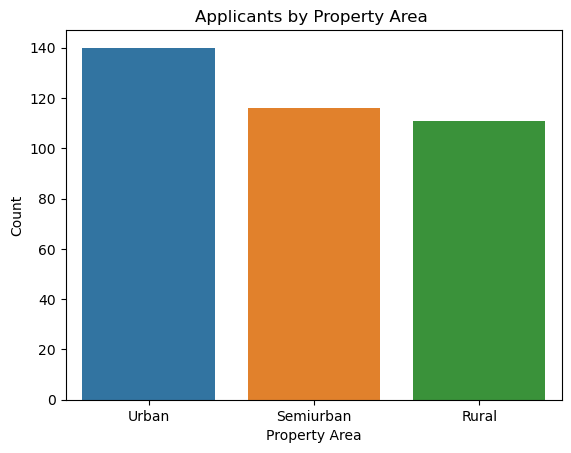

In [65]:

sns.countplot(x='Property_Area', data=df, hue='Property_Area')

plt.title('Applicants by Property Area ')
plt.xlabel('Property Area')
plt.ylabel('Count')

plt.show()